In [1]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PROJECT_ROOT = Path(os.getcwd())
CSV_PATH = os.path.join(PROJECT_ROOT, 'data', 'UrbanSound8K', 'metadata', 'UrbanSound8K.csv')

In [3]:
df = pd.read_csv(CSV_PATH)
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
class_distribution = df.groupby(["fold", "class"]).size().unstack(fill_value=0)

def plot_class_distribution(folds):
    if isinstance(folds, int):
        folds = [folds]

    valid_folds = [fold for fold in folds if fold in class_distribution.index]
    if not valid_folds:
        print(f"No valid folds found in dataset: {folds}")
        return

    # Sum class distributions across selected folds
    combined_distribution = class_distribution.loc[valid_folds].sum()

    num_classes = len(combined_distribution)
    colors = sns.color_palette("mako", n_colors=num_classes)

    plt.figure(figsize=(7, 4))
    plt.bar(combined_distribution.index, combined_distribution.values, color=colors)
    
    plt.title(f"Class Distribution for Fold(s) {', '.join(map(str, valid_folds))}", fontsize=12, fontweight="bold")
    
    plt.xticks(rotation=65, ha="right", fontsize=10)
    plt.yticks(fontsize=10)

    sns.despine()
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.show()

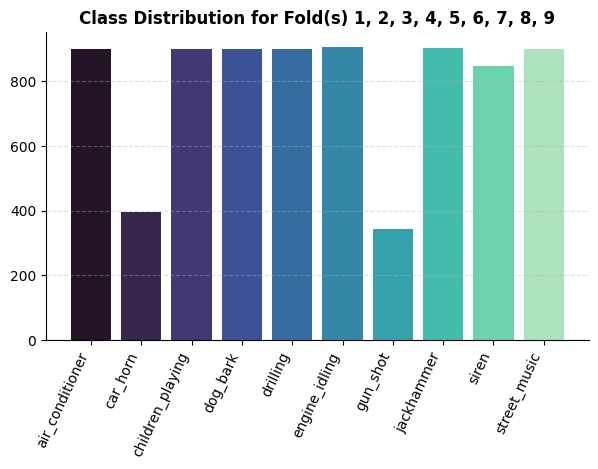

In [5]:
plot_class_distribution([1, 2, 3, 4, 5, 6, 7, 8, 9])

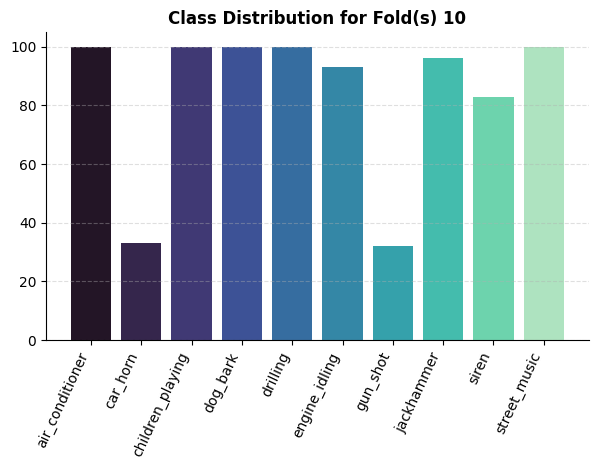

In [6]:
plot_class_distribution(10)

In [7]:
def plot_class_distribution_pie(folds):
    if isinstance(folds, int):
        folds = [folds]

    valid_folds = [fold for fold in folds if fold in class_distribution.index]
    if not valid_folds:
        print(f"No valid folds found in dataset: {folds}")
        return

    combined_distribution = class_distribution.loc[valid_folds].sum()

    num_classes = len(combined_distribution)
    colors = sns.color_palette("mako", n_colors=num_classes)

    plt.figure(figsize=(5, 5))
    plt.pie(
        combined_distribution.values,
        labels=combined_distribution.index,
        autopct="%1.1f%%",
        colors=colors,
        startangle=140,
        wedgeprops={"edgecolor": "black", "linewidth": 1}
    )

    plt.title(f"Class Distribution for Fold(s) {', '.join(map(str, valid_folds))}", fontsize=12, fontweight="bold")
    plt.show()

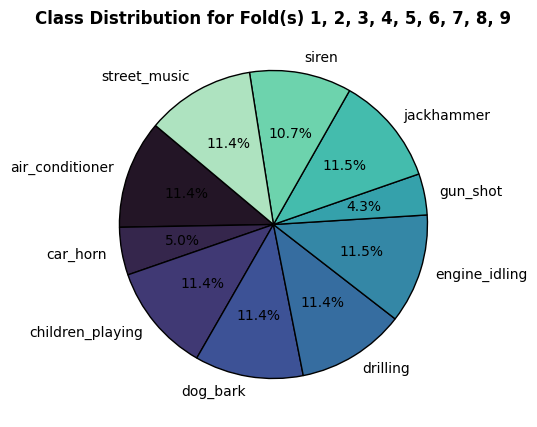

In [8]:
plot_class_distribution_pie([1, 2, 3, 4, 5, 6, 7, 8, 9])

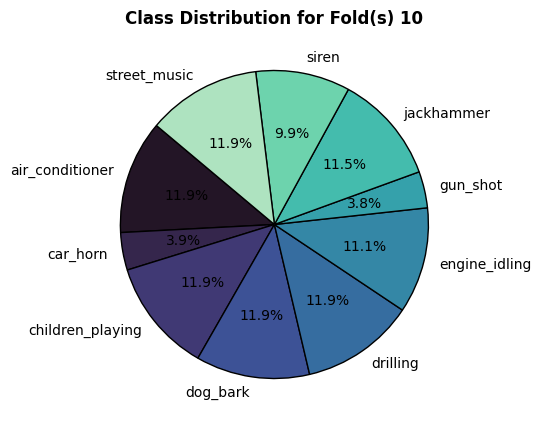

In [9]:
plot_class_distribution_pie(10)